<a href="https://colab.research.google.com/github/mrenrique/projects/blob/main/posts/diabetes_prediction_based_on_cdc_diabetes_health_indicators/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

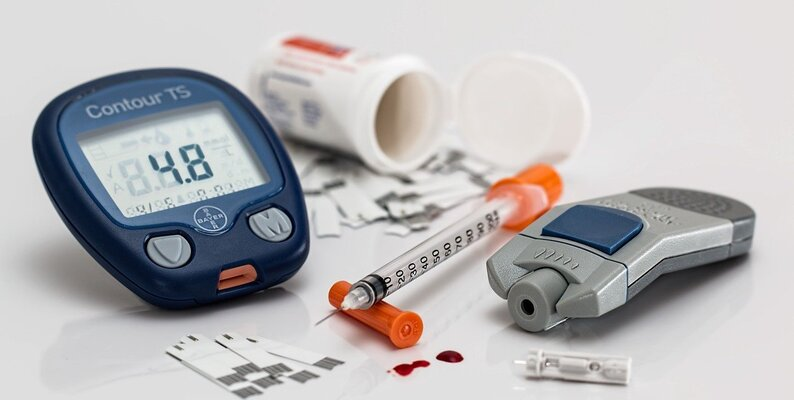

## Problem Undestanding ❓

### What’s the problem? 🤔

The goal of this project is to build a **Model for predicting whether a patients has Diabetes (Outcome = 1) or not (Outcome = 0)**, based on several diagnostic measurements, including glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, age and more.

Since the outcome (Diabetes or not Diabetes) is a **categorical variable**, we are dealing with a **Classification Problem**.

### Data Dictionary

Data columns

- Diabetes_012 (Target Feature): No=0, Pre-diabetes or borderline diabetes=1, Diabetes=2

- HighBP: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> Yes=1, No=0

- HighChol: Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> Yes=1, No=0

- CholCheck: Cholesterol check within past five years --> Yes=1, No=0

- BMI: Body Mass Index (BMI) --> BMI value

- Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> Yes=1, No=0

- Stroke: (Ever told) you had a stroke. --> Yes=1, No=0

- HeartDiseaseorAttack: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> Yes=1, No=0

- PhyActiviity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> Yes=1, No=0

- Fruits: Consume Fruit 1 or more times per day --> Yes=1, No=0

- Veggies: Consume Vegetables 1 or more times per day --> Yes=1, No=0

- HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> Yes=1, No=0

- AnyHealthcare: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> Yes=1, No=0

- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> Yes=1, No=0

- GenHlth: Would you say that in general your health is: --> Ordinal feature: 1=Excellent up to 5=Poor

- MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> Ordinal=number of days

- PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> Ordinal=number of days

- DiffWalk: Do you have serious difficulty walking or climbing stairs? --> Yes=1, No=0

- Sex: Indicate sex of respondent. --> Female=0, Male=1

- Age: Age category --> Ordinal: age 18-24=1, all the way up to 13, which is 80 and older. 5 year increments.

- Education: What is the highest grade or year of school you completed? --> Ordinal: 1 being never attended school or kindergarten only up to 6 being college 4 years or more

- Income: Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> Ordinal: 1 being less than  10,000 all the way up to 8 being 75,000 or more

### What & How to measure KPI? 🎯

Since the goal is to detect diabetes, which is an important health concern, the consequences of missing positive instances (diabetes cases) are more severe  than misclassifying negative instances. False negatives (missing actual diabetes cases) could cause delayed treatment or intervention. Hence, it's better to **focus on recall metric over the accuraciness of a model**.

The metrics to be used are:

- Accuracy
- Precision
- Recall
- F1
- Support

For more information, [here is an article on how the metrics work]('https://medium.com/analytics-vidhya/machine-learning-metrics-in-simple-terms-d58a9c85f9f6)

## Setting Things Up ⚙

### Importing Libraries 🧰

Here it's imported all the libraries requiered for each process of the project.

In [ ]:
# Importing Required libraries
import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

# To avoi warnings
import warnings
warnings.filterwarnings("ignore")

### Customized Settings 🎨

Bellow, there is a function that customizes some of the default graph parameters to make them look a bit cleaner and easy to digest.

In [ ]:
g=''

def ChartWithCustomSettings(graph=g, figW=6, figH=4, title='Title'):
    graph.figure.set_figwidth(figW)
    graph.figure.set_figheight(figH)

    sns.set_theme(style='white', palette='blend:#005ca5,#ffffff')
    sns.despine() #left=True
    g.set(xlabel=None, ylabel=None)
    plt.title(title, pad=15)

This chunk of code just show a pallet with the colors used in this projec's graphs

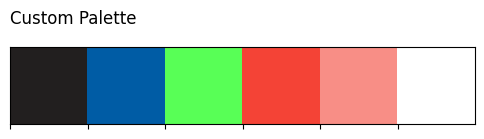

In [ ]:
sns.palplot(['#221f1f', '#005ca5', '#58FF56', '#f44336', '#f88e86', '#ffffff'])
plt.title('Custom Palette', loc='left', fontfamily='Sans Serif', fontsize=12, y=1.2)
plt.show()

## Extract & Load Data 🗃️

Here you can find the Dataset used in this project: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

The dataset came in two files containing Training and Test Data

In [ ]:
# Loading Diabetes Data
diabetes_data = pd.read_csv('diabetes-health-indicators.csv')

diabetes_data.head(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


## Data Pre-processing 🧼

### Data Cleanning

#### Checking For Missing Values

Let's first check the number of Missing Values for each feature.
Good! Looks like there are not missing values.

In [ ]:
# Show Total Missing Values in Percentage Format
diabetes_data.isnull().sum()/diabetes_data.shape[0]*100

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

Just so you know, We could have also use a plot to visualize Missing Values

<Axes: >

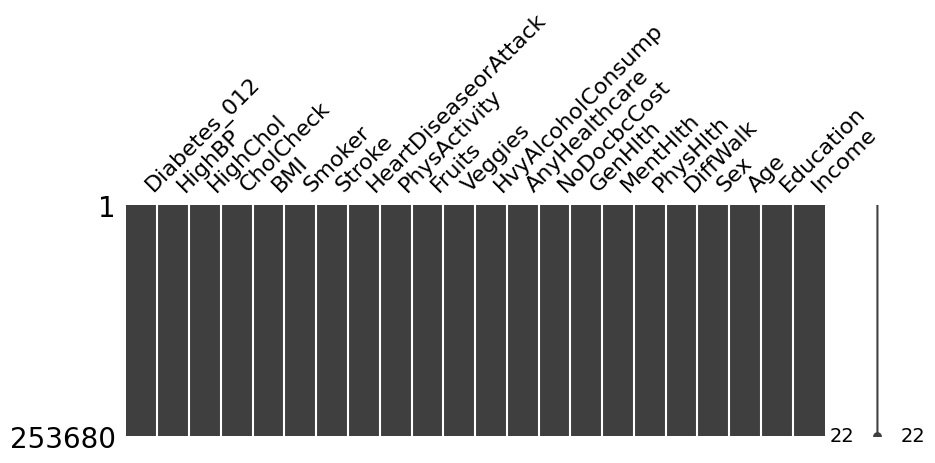

In [ ]:
# To Check Missing Values
import missingno as msno

msno.matrix(diabetes_data, figsize=(10, 3))

#### Checking For Dulicate Values

In [ ]:
# Checking Duplicate rows
duplicates = diabetes_data[diabetes_data.duplicated()]

print(f'There are {len(duplicates)} Duplicate Rows')

There are 23899 Duplicate Rows


In [ ]:
# Deleting Duplicate rows
diabetes_data.drop_duplicates(inplace = True)

duplicates = diabetes_data[diabetes_data.duplicated()]
print(f'There are {len(duplicates)} Duplicate Rows')

There are 0 Duplicate Rows


#### Identifing Outliers

Seems like there are not values lying outside a normal range

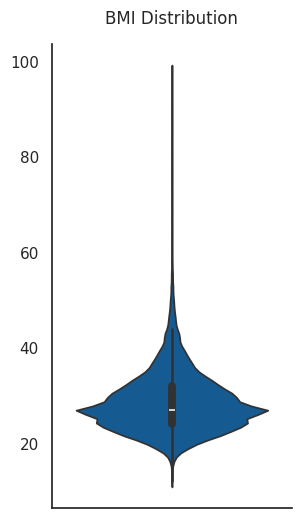

In [ ]:
g=sns.catplot(data=diabetes_data, y='BMI', kind='violin')
ChartWithCustomSettings(g, 3, 5, 'BMI Distribution')

Let's confirm this using `Z-score` to check if they are above the usual threshold level

In [ ]:
# For Identifing Outliers
from scipy import stats

feature = diabetes_data['BMI']
z = np.abs(stats.zscore(feature))

outliers = len(np.where(z >= 3)[0])

print(f'There were found {outliers} outliers in {feature.name} Feature')

There were found 2547 outliers in BMI Feature


### Backup Pre Processed Data

In [ ]:
pre_processed_data = diabetes_data.copy()

## Exploratory Data Analysis 📊

In this section we analized in three ways:
- General statistics of the dataset
- Visualizing Each Feature (Univariate Analysis)
- Visualizing multiple Features at the same time (Multivariate Analysis) and its correlation

### General View of the Dataset 🧮

In [ ]:
pre_processed_data.sample(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
16596,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,10.0,6.0,7.0
4008,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,15.0,2.0,0.0,0.0,4.0,6.0,8.0
9161,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0
249950,0.0,0.0,1.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,1.0
22638,0.0,0.0,1.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,4.0,0.0,0.0,0.0,9.0,5.0,6.0


In [ ]:
# Number of rows & columns
rows , col =  pre_processed_data.shape

print(f'Number of Columns : {col} \nNumber of Rows : {rows}')

Number of Columns : 22 
Number of Rows : 229781


In [ ]:
pre_processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

Most of the columns only have 2 unique values, which indicates that these columns are yes/no questions.

In [ ]:
pre_processed_data.nunique().sort_values(ascending=False) #.plot(kind='barh', figsize=(5,10), zorder=3)).spines[['top','right', 'left', 'bottom']].set_visible(False)
# plt.grid(axis='x', linestyle='--', alpha=.4)

BMI                     84
PhysHlth                31
MentHlth                31
Age                     13
Income                   8
Education                6
GenHlth                  5
Diabetes_012             3
PhysActivity             2
Fruits                   2
Veggies                  2
HighBP                   2
AnyHealthcare            2
NoDocbcCost              2
HeartDiseaseorAttack     2
Stroke                   2
Smoker                   2
DiffWalk                 2
Sex                      2
CholCheck                2
HighChol                 2
HvyAlcoholConsump        2
dtype: int64

We can confirm this assuption by listing all columns' unique values

In [ ]:
for column in list(pre_processed_data):
    print(f'{column}: {pre_processed_data[column].unique()}\n')

Diabetes_012: [0. 2. 1.]

HighBP: [1. 0.]

HighChol: [1. 0.]

CholCheck: [1. 0.]

BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]

Smoker: [1. 0.]

Stroke: [0. 1.]

HeartDiseaseorAttack: [0. 1.]

PhysActivity: [0. 1.]

Fruits: [0. 1.]

Veggies: [1. 0.]

HvyAlcoholConsump: [0. 1.]

AnyHealthcare: [1. 0.]

NoDocbcCost: [0. 1.]

GenHlth: [5. 3. 2. 4. 1.]

MentHlth: [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]

PhysHlth: [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]

DiffWalk: [1. 0.]

Sex: [0. 1.]

Age: [ 9.  7. 11. 10.  8. 13.  4.  6.

In [ ]:
# Statistics of Numerical Features
pre_processed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


### Let's Analyze Most Important Features 💡

#### Target Variable (Diabetes_012)

We can observe that this dataset contains most of the samples clasified as no diabetes

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Pre Diabetes'), Text(2, 0, 'Diabetes')]

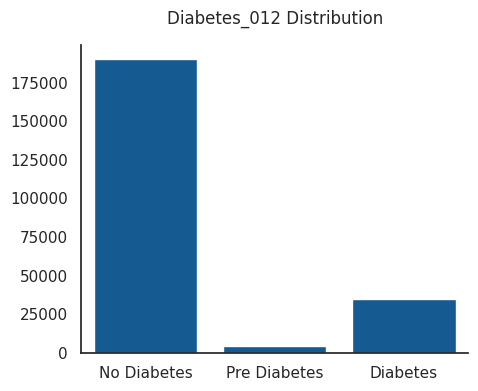

In [ ]:
g=sns.countplot(data=pre_processed_data, x='Diabetes_012')
ChartWithCustomSettings(g, 5, 4, 'Diabetes_012 Distribution')
g.axes.set_xticks([0, 1, 2])
g.axes.set_xticklabels(['No Diabetes', 'Pre Diabetes', 'Diabetes'])

In [ ]:
DiabetesInPtg = pre_processed_data['Diabetes_012'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
DiabetesInPtg.rename({0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'})

Diabetes_012
No Diabetes     82.7%
Diabetes        15.3%
Pre Diabetes     2.0%
Name: proportion, dtype: object

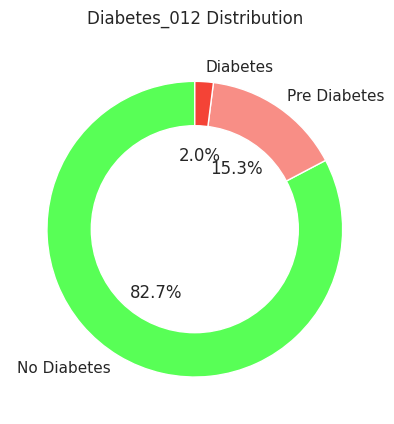

In [ ]:
labels = ['No Diabetes', 'Pre Diabetes', 'Diabetes']
data = pre_processed_data['Diabetes_012'].value_counts()

plt.pie(
    x=data,
    labels = labels,
    autopct='%1.1f%%',
    colors=['#58FF56', '#f88e86', '#f44336'],
    startangle=90,
    pctdistance=0.5, # Distance of percent labels from the center
    )

### Add a hole in the pie
hole = plt.Circle((0, 0), 0.7, facecolor='white')
plt.gcf().gca().add_artist(hole)

ChartWithCustomSettings(g, 5, 5, 'Diabetes_012 Distribution')

In [ ]:
peopleWithDiabetes = pre_processed_data[pre_processed_data['Diabetes_012'].isin([1, 2])]
peopleWithOutDiabetes = pre_processed_data[pre_processed_data['Diabetes_012'] == 0]
print(f'People With Diabetes: {len(peopleWithDiabetes)} \nPeople Without Diabetes: {len(peopleWithOutDiabetes)} ')

People With Diabetes: 39726 
People Without Diabetes: 190055 


#### BMI:

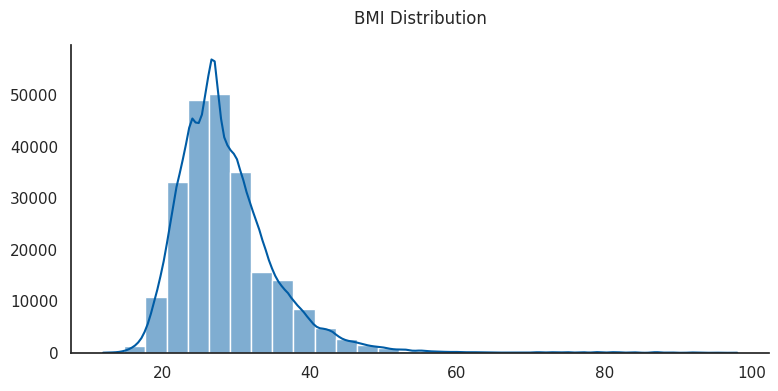

In [ ]:
g=sns.histplot(data=pre_processed_data, x='BMI', bins=30, kde=True)
ChartWithCustomSettings(g, 9, 4, 'BMI Distribution')

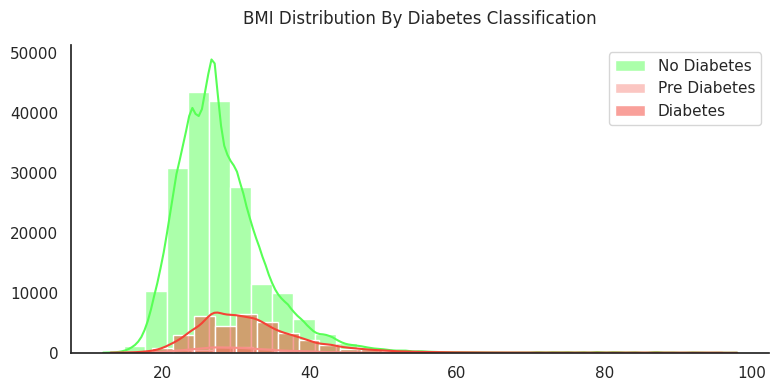

In [ ]:
g=sns.histplot(data=pre_processed_data[pre_processed_data['Diabetes_012'] == 0], x='BMI', bins=30, color='#58FF56', label='No Diabetes', kde=True)
g=sns.histplot(data=pre_processed_data[pre_processed_data['Diabetes_012'] == 1], x='BMI', bins=30, color='#f88e86', label='Pre Diabetes', kde=True)
g=sns.histplot(data=pre_processed_data[pre_processed_data['Diabetes_012'] == 2], x='BMI', bins=30, color='#f44336', label='Diabetes', kde=True)
plt.legend()
ChartWithCustomSettings(g, 9, 4, 'BMI Distribution By Diabetes Classification')

([<matplotlib.axis.XTick at 0x7ff918b9cd00>,
 [Text(0, 0, 'No Diabetes'),
  Text(1, 0, 'Pre Diabetes'),
  Text(2, 0, 'Diabetes')])

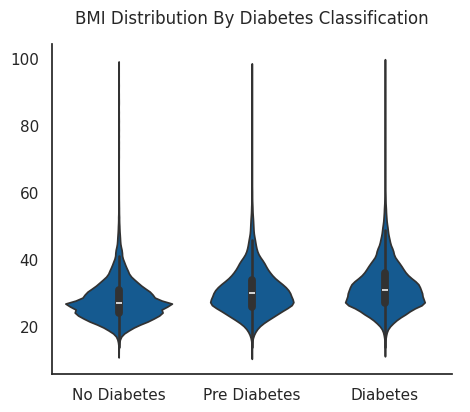

In [ ]:
g=sns.catplot(data=pre_processed_data, x='Diabetes_012', y='BMI', estimator=np.mean, kind='violin')
ChartWithCustomSettings(g, 5, 4, 'BMI Distribution By Diabetes Classification')
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Pre Diabetes', 'Diabetes'])

#### Age:

[Text(1, 0, '18-24'),
 Text(2, 0, '25-29'),
 Text(3, 0, '30-34'),
 Text(4, 0, '35-39'),
 Text(5, 0, '40-44'),
 Text(6, 0, '45-49'),
 Text(7, 0, '50-54'),
 Text(8, 0, '55-59'),
 Text(9, 0, '60-64'),
 Text(10, 0, '65-69'),
 Text(11, 0, '70-74'),
 Text(12, 0, '75-79'),
 Text(13, 0, '+80')]

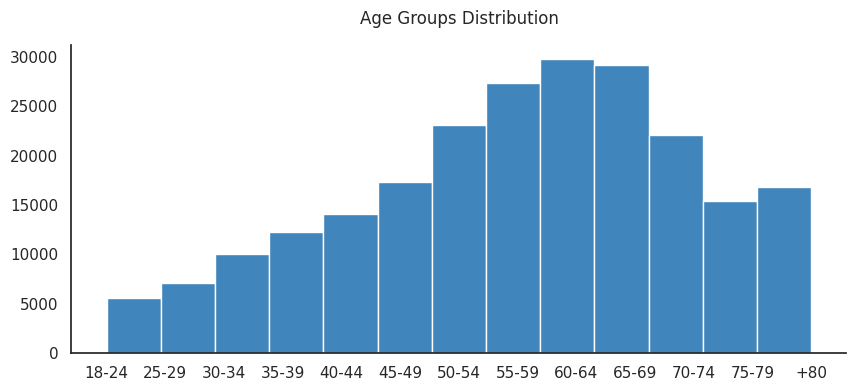

In [ ]:
g=sns.histplot(data=pre_processed_data, x='Age', bins=13)
ChartWithCustomSettings(g, 9, 4, 'Age Groups Distribution')

xCustomLabels=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '+80']
g.axes.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
g.axes.set_xticklabels(xCustomLabels)

[Text(1, 0, '18-24'),
 Text(2, 0, '25-29'),
 Text(3, 0, '30-34'),
 Text(4, 0, '35-39'),
 Text(5, 0, '40-44'),
 Text(6, 0, '45-49'),
 Text(7, 0, '50-54'),
 Text(8, 0, '55-59'),
 Text(9, 0, '60-64'),
 Text(10, 0, '65-69'),
 Text(11, 0, '70-74'),
 Text(12, 0, '75-79'),
 Text(13, 0, '+80')]

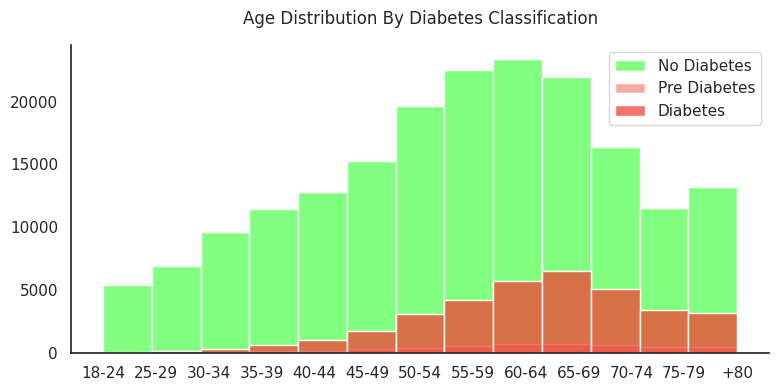

In [ ]:
g=sns.histplot(data=pre_processed_data[pre_processed_data['Diabetes_012'] == 0], x='Age', bins=13, color='#58FF56', label='No Diabetes')
g=sns.histplot(data=pre_processed_data[pre_processed_data['Diabetes_012'] == 1], x='Age', bins=13, color='#f88e86', label='Pre Diabetes')
g=sns.histplot(data=pre_processed_data[pre_processed_data['Diabetes_012'] == 2], x='Age', bins=13, color='#f44336', label='Diabetes')
ChartWithCustomSettings(g, 9, 4, 'Age Distribution By Diabetes Classification')
plt.legend()
xCustomLabels=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '+80']
g.axes.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
g.axes.set_xticklabels(xCustomLabels)

#### Sex:

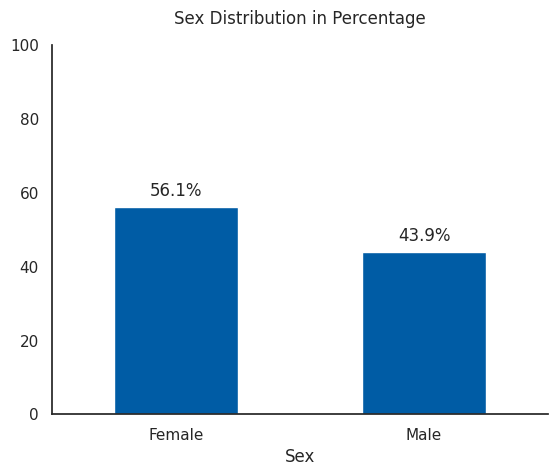

In [ ]:
# Count the number of occurrences of each sex
sex_counts = pre_processed_data['Sex'].value_counts(normalize=True).mul(100).round(1)

fig, ax = plt.subplots()

# Plot the sex counts as a bar chart
sex_counts.plot(kind='bar')
ChartWithCustomSettings(g, 4, 3, 'Sex Distribution in Percentage')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.ylim(0, 100)

# Sum up the rows of our data to get the total value of each bar.
totals = pd.DataFrame(sex_counts).sum(axis=1)

# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 3

# Add labels to each bar
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, f'{total}%', ha='center')

([<matplotlib.axis.XTick at 0x7ff960fe8400>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

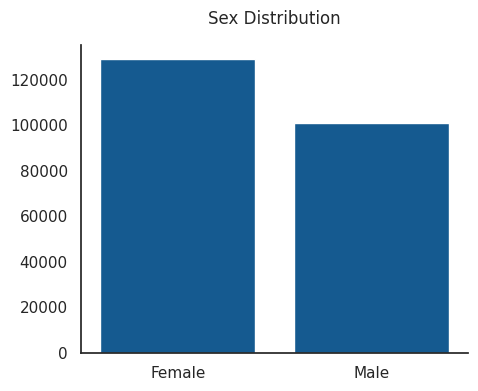

In [ ]:
fig, ax = plt.subplots()

g=sns.countplot(data=pre_processed_data, x='Sex')
ChartWithCustomSettings(g, 5, 4, 'Sex Distribution')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

Diabetes_012     0.0   1.0    2.0
Sex                              
Female        107905  2604  18345
Male           82150  2025  16752 



([<matplotlib.axis.XTick at 0x799c2e46f010>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

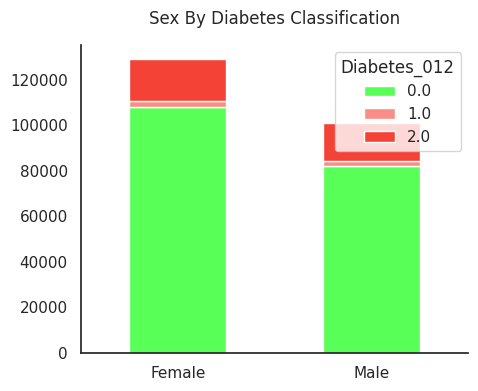

In [ ]:
SmokerVsDiabetes = pd.crosstab(pre_processed_data['Sex'], pre_processed_data['Diabetes_012'])
print(SmokerVsDiabetes.rename({0: 'Female', 1: 'Male'}), '\n')

g = SmokerVsDiabetes.plot(kind="bar", stacked=True, rot=0, color=['#58FF56', '#f88e86', '#f44336'])
ChartWithCustomSettings(g, 5, 4, 'Sex By Diabetes Classification')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

Sex              0.0    1.0
Diabetes_012               
No Diabetes   107905  82150
Pre Diabetes    2604   2025
Diabetes       18345  16752 



([<matplotlib.axis.XTick at 0x799c2ed93940>,
 [Text(0, 0, 'No Diabetes'),
  Text(1, 0, 'Pre Diabetes'),
  Text(2, 0, 'Diabetes')])

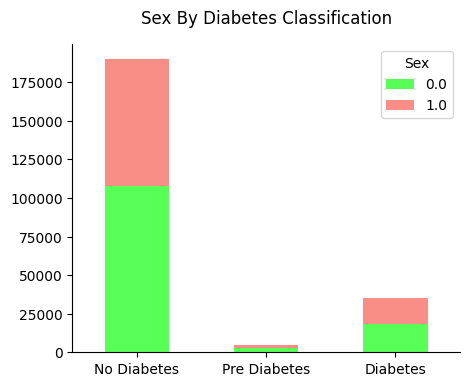

In [ ]:
SmokerByDiabetes = pd.crosstab(pre_processed_data['Diabetes_012'], pre_processed_data['Sex'])
print(SmokerByDiabetes.rename({0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'}), '\n')

g = SmokerByDiabetes.plot(kind="bar", stacked=True, rot=0, color=['#58FF56', '#f88e86'])
ChartWithCustomSettings(g, 5, 4, 'Sex By Diabetes Classification')
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Pre Diabetes', 'Diabetes'])

#### Education:

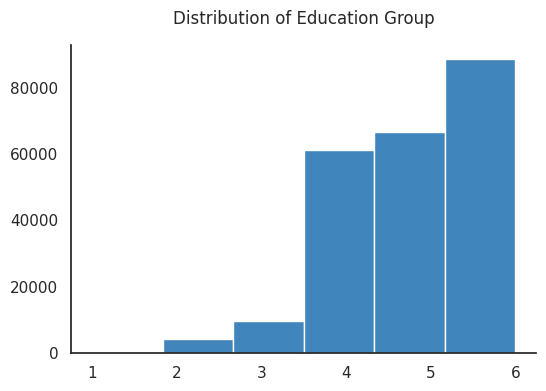

In [ ]:
g=sns.histplot(data=pre_processed_data, x='Education', bins=6)
ChartWithCustomSettings(g, 6, 4, 'Distribution of Education Group')

#### Smoker:

Smoker's relation with Diabetes

Diabetes_012     0.0   1.0    2.0
Smoker                           
0.0           103559  2348  16874
1.0            86496  2281  18223


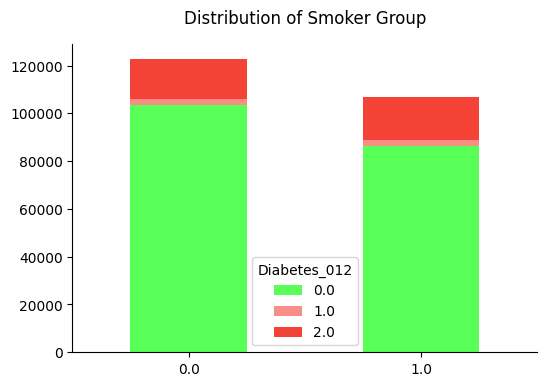

In [ ]:
SmokerVsDiabetes = pd.crosstab(pre_processed_data['Smoker'], pre_processed_data['Diabetes_012'])
print(SmokerVsDiabetes)
g=SmokerVsDiabetes.plot(kind="bar", stacked=True, rot=0, color=['#58FF56', '#f88e86', '#f44336'])
ChartWithCustomSettings(g, 6, 4, 'Distribution of Smoker Group')

#### HighChol:

In [ ]:
Is the proportion of high cholesterol significantly different across diabetics and no-diabetes?
H0 - High cholesterol proportion is not significantly different across diabetics and no-diabetes.
Ha - High cholesterol proportion is different across diabetics and no-diabetes.

In [ ]:
contingency = pd.crosstab(pre_processed_data['Diabetes_012'], pre_processed_data['HighChol'])
contingency

HighChol,0.0,1.0
Diabetes_012,,
0.0,114917,75138
1.0,1755,2874
2.0,11601,23496


Text(0.5, 1.0, 'High cholesterol proportion across diabetics, Pre Diabetes and No Diabetes')

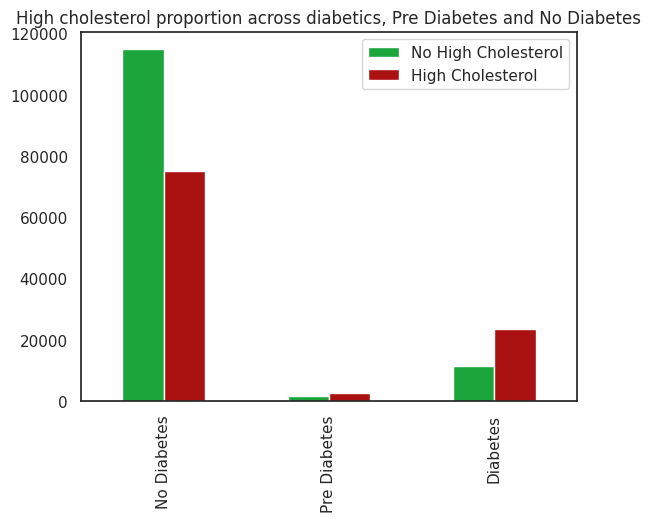

In [ ]:
# Visualize high cholesterol proportions
ax = contingency.plot(kind='bar', color=['#1CA53B','#AA1111'])
ax.set(xlabel=None)
ax.set_xticklabels(['No Diabetes', 'Pre Diabetes', 'Diabetes'])
ax.legend(['No High Cholesterol', 'High Cholesterol'])
plt.title('High cholesterol proportion across diabetics, Pre Diabetes and No Diabetes')

### How They Behave if We Put Them Together? 🤔
Correlation between Target and Features

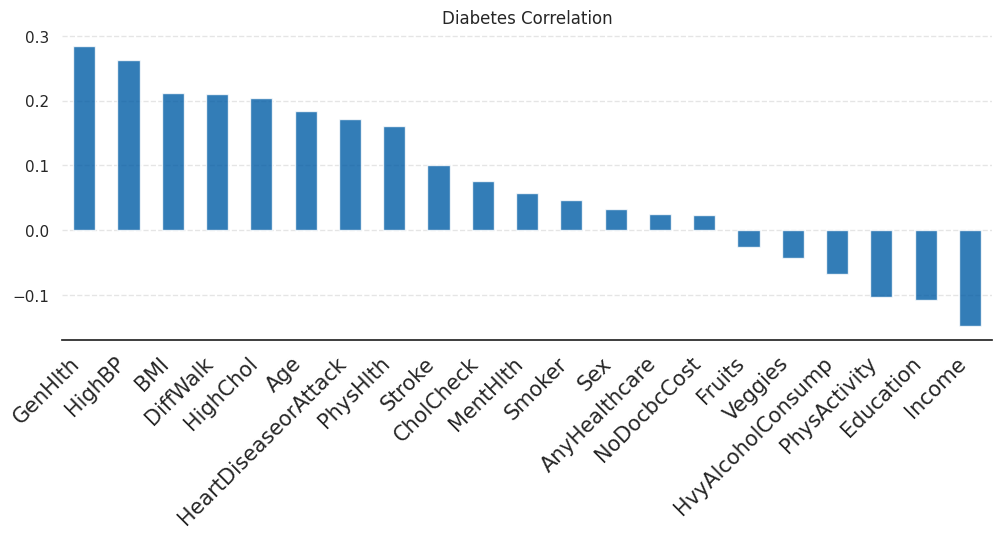

In [ ]:
(pre_processed_data.drop('Diabetes_012', axis=1)
   .corrwith(pre_processed_data['Diabetes_012'])
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

Now let's visualize the  correlation between each pair of variable.

positive correlation between the Physical Health and General Health
Income and General Health correlated negativily implying that individuals with lower incomes may experience limited access to private medical care, potentially leading to negative impacts on their overall health outcomes.

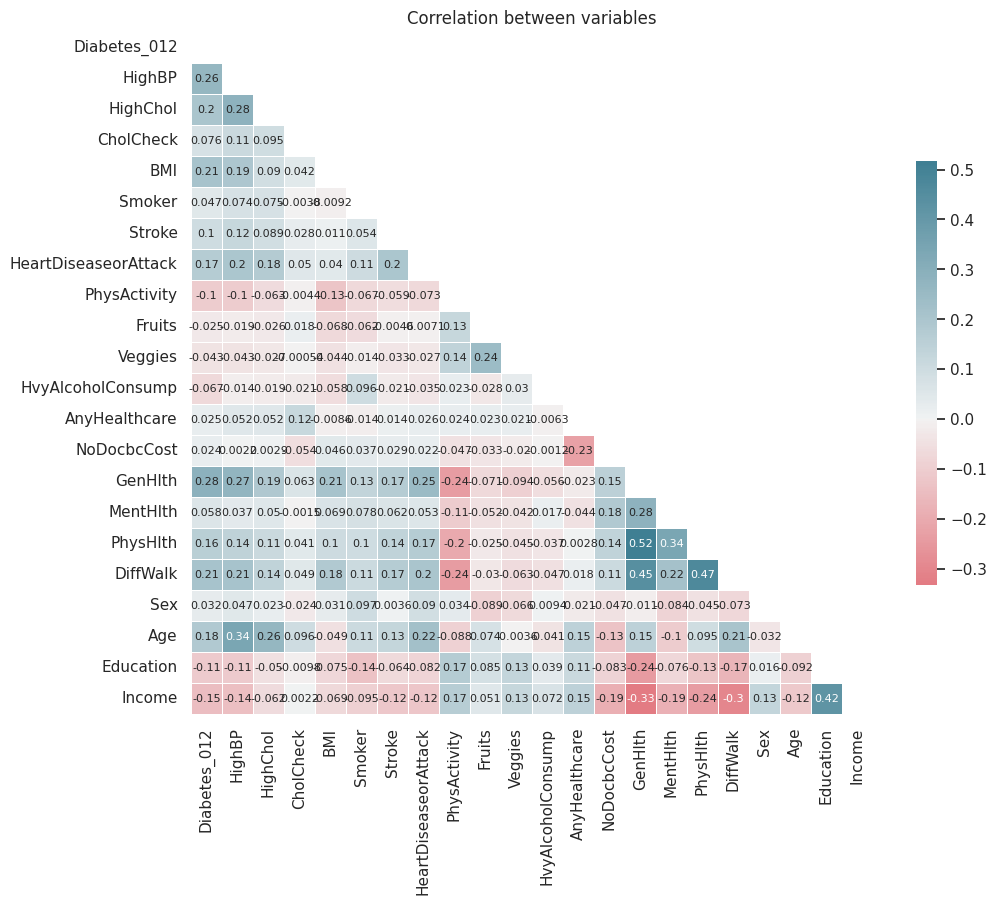

In [ ]:
# Calculate correlation between each pair of variable
corr = pre_processed_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Inserir a figura
f, ax = plt.subplots(figsize=(11, 11))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask
ax = sns.heatmap(corr,
                 mask=mask,
                 cmap=cmap, # 'gray'
                 center=0,
                 annot=True,
                 annot_kws= {'size':8},
                 square=True,
                 xticklabels=True,
                 yticklabels=True,
                 linewidths=.5,
                 cbar_kws={'shrink': .5},
                 ax=ax
                )

ax.set_title('Correlation between variables', fontsize=12);

## Data Transformation

### Feature Engineering🔪

Now, let's start shaping the dataset to get ready for the modeling part

#### Adding Features

In [ ]:
# NewBMI = pd.Series(['Underweight','Normal', 'Overweight','Obesity 1', 'Obesity 2', 'Obesity 3'], dtype = 'category')
NewBMI = pd.Series([0, 1, 2, 3, 4, 5], dtype = 'int64')

pre_processed_data.loc[pre_processed_data['BMI'] < 18.5, 'NewBMI'] = NewBMI[0]
pre_processed_data.loc[(pre_processed_data['BMI'] > 18.5) & (pre_processed_data['BMI'] <= 24.9), 'NewBMI'] = NewBMI[1]
pre_processed_data.loc[(pre_processed_data['BMI'] > 24.9) & (pre_processed_data['BMI'] <= 29.9), 'NewBMI'] = NewBMI[2]
pre_processed_data.loc[(pre_processed_data['BMI'] > 29.9) & (pre_processed_data['BMI'] <= 34.9), 'NewBMI'] = NewBMI[3]
pre_processed_data.loc[(pre_processed_data['BMI'] > 34.9) & (pre_processed_data['BMI'] <= 39.9), 'NewBMI'] = NewBMI[4]
pre_processed_data.loc[pre_processed_data['BMI'] > 39.9, 'NewBMI'] = NewBMI[5]

pre_processed_data['NewBMI'] = pd.to_numeric(pre_processed_data['NewBMI'])
pre_processed_data.groupby('NewBMI').size()

NewBMI
0.0     3053
1.0    58927
2.0    82859
3.0    50765
4.0    20461
5.0    13716
dtype: int64

### Feature selection

First, let's remember the dataset structure

In [ ]:
# Show a sample of the current dataset
pre_processed_data.sample(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,NewBMI
198097,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,1.0,2.0,0.0,0.0,1.0,6.0,6.0,3.0
22147,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,5.0,2.0,0.0,1.0,4.0,6.0,8.0,2.0
79663,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,4.0,0.0,10.0,0.0,1.0,9.0,4.0,7.0,2.0


#### Feature selection with Chi-Square

> Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

we select only those columns which are important and are not correlated with each other.

In [ ]:
from sklearn.feature_selection import chi2

X = pre_processed_data.drop('Diabetes_012', axis=1)
y = pre_processed_data['Diabetes_012']

# returns f-score and chi-square
f_score = chi2(X, y)

chisquare = pd.DataFrame(f_score[0], index = X.columns)
chisquare.rename(columns={0: 'ChiSqr_Score'}, inplace=True)
chisquare_list = chisquare.sort_values(by='ChiSqr_Score', ascending=False)
chisquare_list

,ChiSqr_Score
PhysHlth,103705.813420
BMI,16667.006177
MentHlth,13499.056578
Age,9400.408945
HighBP,8633.562752
DiffWalk,8310.280494
GenHlth,8142.602678
NewBMI,6783.974906
HeartDiseaseorAttack,6015.661944
HighChol,5381.985473


In [ ]:
# pre_processed_data
features_to_drop = chisquare_list[chisquare_list['ChiSqr_Score'] < 250].index.tolist()
# features_to_drop = list(features_to_drop.index)
features_to_drop

# Number of rows & columns
col_before =  pre_processed_data.shape[1]
print(f'Number of Columns Before: {col_before}\n')

pre_processed_data.drop(columns=features_to_drop, inplace=True)

col_after =  pre_processed_data.shape[1]
print(f'Number of Columns After: {col_after}')

Number of Columns Before: 23

Number of Columns After: 17


### Checking For Proper Data Type

Seems like all features are numerical, and based on its values, we can confirm they have the proper data type. Let's move on to the next part.

In [ ]:
pre_processed_data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Age                     float64
Education               float64
Income                  float64
NewBMI                  float64
dtype: object

### Creating a binary dataset for diabetes vs. no diabetes

Change: diabetic 2 to 1, pre-diabetic 1 to 0 in order to have 0 for no diabetes and 1 for pre-diabetes and diabetes

In [ ]:
# Copy the old dataframe to a new one
pre_processed_data['Diabetes_012'] = pre_processed_data['Diabetes_012'].replace({1:0, 2:1})

pre_processed_data['Diabetes_012'].unique()

array([0., 1.])

### Backup Processed Data

In [ ]:
processed_data = pre_processed_data.copy()

### Splitting the data into train & test set

But first, we need to split the data into train & test set to get  ready for fitting it to the models

In [ ]:
# For Splitting data
from sklearn.model_selection import train_test_split

# Splitting the data
X = processed_data.drop('Diabetes_012', axis=1)

y = processed_data['Diabetes_012']

# Splitting the data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(183824, 16) (45957, 16)


### Scaling Data
Standardize the dataset using Feature Scaling

As we see in the Distribution Charts, there are some values with high magnitude which could cause data leakage. So, to supress this effect, we need to normalize its range of all numerical features. This can be acheived by using **Feature Scaling**.

By using StandardScaler(). We'll get all numerical features with proper magnitude.

In [ ]:
# For Data Engineering
from sklearn.preprocessing import StandardScaler

X_before_scaling = X

# Initialise the Scaler
scaler = StandardScaler()

# Scale the training dataset
X = scaler.fit_transform(X_before_scaling)

# Convert the NumPy array back to a Pandas DataFrame
X = pd.DataFrame(X, columns=X_before_scaling.columns)

X.head(3)

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,NewBMI
0,1.095675,1.124132,1.667220,1.071208,-0.216455,-0.339257,-1.658403,-0.254232,2.253111,1.879074,1.141300,2.095383,0.295241,-0.987588,-1.381324,2.339442
1,-0.912679,-0.889575,-0.543101,1.071208,-0.216455,-0.339257,0.602990,-0.254232,0.374618,-0.454434,-0.516791,-0.477240,-0.351213,1.026729,-2.337131,-0.255203
2,1.095675,1.124132,-0.101037,-0.933526,-0.216455,-0.339257,-1.658403,-0.254232,2.253111,3.434746,2.799391,2.095383,0.295241,-0.987588,1.008193,-0.255203


### Creating a 50-50 balanced dataset

When the dataset is imbalanced, a poor the model performance can be expected at correctly identifying samples of the minority class

#### Oversampling using SMOTE
(Synthetic Minority Over-sampling Technique)

In [ ]:
#Check size of class
y.value_counts()

Diabetes_012
0.0    194684
1.0     35097
Name: count, dtype: int64

Diabetes_012
0.0    194684
1.0     35097
Name: count, dtype: int64 



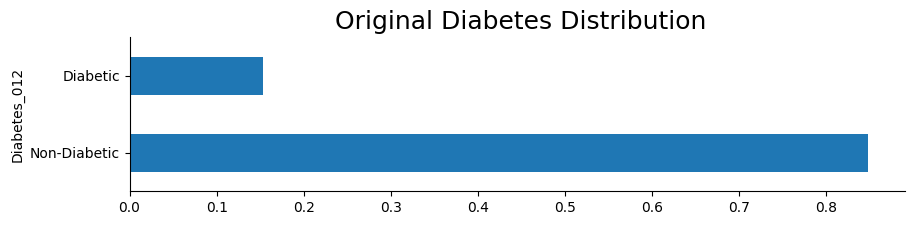


 Diabetes_012
0.0    155662
1.0    155662
Name: count, dtype: int64 



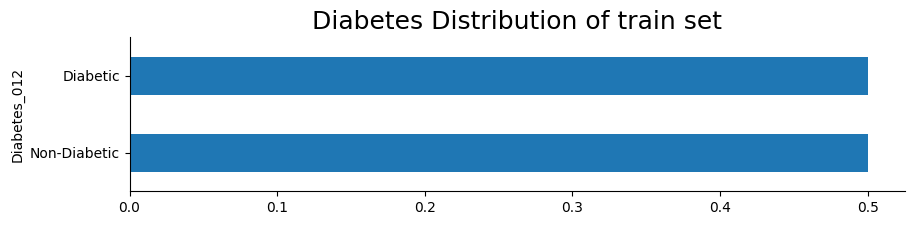

In [ ]:
from imblearn.over_sampling import SMOTE

#oversampling
smote_os = SMOTE(sampling_strategy=1, random_state=42)
X_train, y_train = smote_os.fit_resample(X_train, y_train)

X_train.shape , y_train.shape

print(y.value_counts(), '\n')

y.value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

print('\n', y_train.value_counts(), '\n')

y_train.value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes Distribution of train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

## Building & Evaluating Model(s) 🤖👨‍🏫

### Building

In [ ]:
# For Building Predicting Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Let's start by definning which machine learning models will be used

In [ ]:
# Dictionary of machine learning models that will be trained
models = {
            'LogisticRegression': LogisticRegression(),
            'KNeighborsClassifier': KNeighborsClassifier(),
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'RandomForestClassifier': RandomForestClassifier(),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'XGBClassifier': XGBClassifier(),
            'LGBMClassifier': LGBMClassifier(),
        }

Then we can create a function to fit and score models all at once

In [ ]:
# For Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, RocCurveDisplay, classification_report

# Create a fit_and_score function
def fit_and_score(models, X_train, X_test, y_train, y_test):

    """
    Fits and evaluates given machine learning models.
    models : a dict of different Classification Machine Learning Models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """

    # Random seed for reproducible results
    np.random.seed(42)

    # Make a list to keep model scores
    results = []

    # Loop through models
    for name, model in models.items():

        # Fit/Train the model to the data
        model.fit(X_train, y_train)

        # Make Predictions
        y_pred = model.predict(X_train)

        y_pred_proba = model.predict_proba(X_train)[:, 1]

        # X_train Scores
        acc_score_x_train = accuracy_score(y_train, y_pred)
        auc_score_x_train = roc_auc_score(y_train, y_pred_proba)
        rmse_x_train = np.sqrt(mean_squared_error(y_train, y_pred))

        # Y_train Scores
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        acc_score_x_test = accuracy_score(y_test, y_pred)
        auc_score_x_test = roc_auc_score(y_test, y_pred_proba)
        rmse_x_test = np.sqrt(mean_squared_error(y_test, y_pred))

        # Add all metrics of model to a list
        results.append((name, acc_score_x_train, auc_score_x_train, rmse_x_train, acc_score_x_test, auc_score_x_test, rmse_x_test))

        classification_metrics = pd.DataFrame(results, columns=['Model', 'Train_Accuracy', 'Train_AUC', 'Train_RMSE', 'Test_Accuracy','Test_AUC', 'Test_RMSE'])

    return classification_metrics

Let's call our function with all parameters needed

In [ ]:
start = time.time()
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
end = time.time()
print(f"This process took {round((end - start) / 60)} minutes")

[LightGBM] [Info] Number of positive: 155662, number of negative: 155662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 311324, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
This process took 21 minutes


Evaluating Models

Once the models are trained, we evaluate its performance using **R-Squared** which is the choosen metric for evaluating how good the model is at predicting Wild Blueberry Yield. But I also used Mean Squared Error & Root Mean Squared Error for comparison purpuses.

It seems like `RandomForestRegressor` is the best one


In [ ]:
# Add highlights in the dataframe with all models metrics to display best (green) and worst (red) scores
classification_metrics_format = model_scores.style.highlight_max(
    subset = ['Train_Accuracy', 'Train_AUC', 'Test_Accuracy', 'Test_AUC'],
    color = 'green').highlight_min(subset = ['Train_RMSE', 'Test_RMSE'],
                                   color = 'green').highlight_max(subset = ['Train_RMSE', 'Test_RMSE'],
                                                                  color = 'red').highlight_min(subset = ['Train_Accuracy', 'Train_AUC', 'Test_Accuracy', 'Test_AUC'],
                                                                                               color = 'red')
classification_metrics_format

,Model,Train_Accuracy,Train_AUC,Train_RMSE,Test_Accuracy,Test_AUC,Test_RMSE
0,LogisticRegression,0.739394,0.811840,0.510496,0.719346,0.802159,0.529768
1,KNeighborsClassifier,0.877491,0.982080,0.350013,0.683878,0.701480,0.562247
2,DecisionTreeClassifier,0.990377,0.999785,0.098099,0.784559,0.589114,0.464156
3,RandomForestClassifier,0.990367,0.999580,0.098148,0.834541,0.760743,0.406767
4,GradientBoostingClassifier,0.879858,0.953301,0.346615,0.829602,0.803422,0.412793
5,XGBClassifier,0.910601,0.966583,0.298996,0.851687,0.807732,0.385114
6,LGBMClassifier,0.906136,0.964482,0.306372,0.850991,0.808730,0.386017


Here we choose the second best models: ` XGBClassifier and LGBMClassifier` because `DecisionTreeClassifier` seems like its overfitting if we look at its test accuracy

XGBClassifier:
Accuracy: 85.17% 

              precision    recall  f1-score   support

 No Diabetes       0.87      0.97      0.92     39022
    Diabetes       0.52      0.19      0.28      6935

    accuracy                           0.85     45957
   macro avg       0.70      0.58      0.60     45957
weighted avg       0.82      0.85      0.82     45957
 



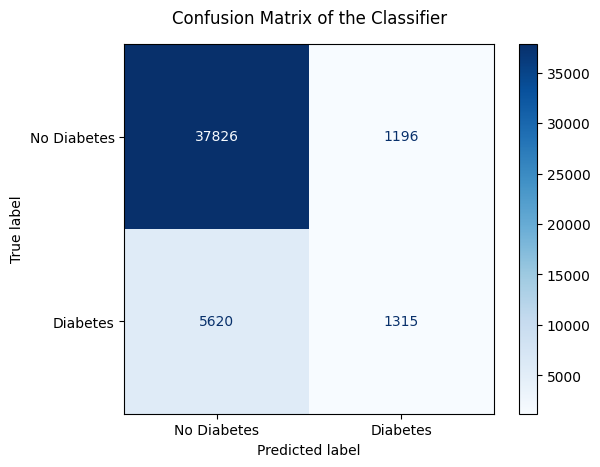

In [ ]:
# Evaluate the Model
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

XGB_accuracy = accuracy_score(y_test, y_pred)

print('XGBClassifier:')

print(f'Accuracy: {round(XGB_accuracy*100,2)}%', '\n')

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']), '\n')

# Plot confusion matrix
graph_confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Diabetes', 'Diabetes'], cmap='Blues') # Greys
plt.title('Confusion Matrix of the Classifier', pad=15)

graph_confusion_matrix

[LightGBM] [Info] Number of positive: 155662, number of negative: 155662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 311324, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBClassifier:
Accuracy: 85.1% 

              precision    recall  f1-score   support

 No Diabetes       0.87      0.96      0.92     39022
    Diabetes       0.51      0.22      0.31      6935

    accuracy                           0.85     45957
   macro avg       0.69      0.59      0.61     45957
weighted avg       0.82      0.85      0.82     45957
 



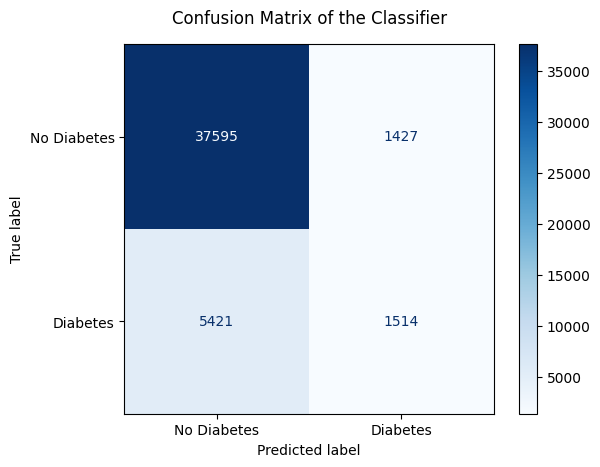

In [ ]:
# Evaluate the Model
LGB_model = LGBMClassifier()
LGB_model.fit(X_train, y_train)
y_pred = LGB_model.predict(X_test)

LGB_accuracy = accuracy_score(y_test, y_pred)

print('LGBClassifier:')

print(f'Accuracy: {round(LGB_accuracy*100,2)}%', '\n')

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']), '\n')

# Plot confusion matrix
graph_confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Diabetes', 'Diabetes'], cmap='Blues') # Greys
plt.title('Confusion Matrix of the Classifier', pad=15)

graph_confusion_matrix

## Hyperparameter Tuning

In [ ]:
# For Optimizing any Model by Finding the Best Hyperparameters
from sklearn.model_selection import GridSearchCV

Now that we find out which model is the best for this scenario with the data we have, let's try tunning a bit more the models by using Hyperparameter Tuning throughout GridSearchCV.

> In this case we use **Grid Search** method to try several combinations. But, when the hyperparameter search space is large is a tedious task. So, instead we can use, **Randomized Search** It is an efficient method.

### Model 1: XGBClassifier

In [ ]:
XGB = XGBClassifier()

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1]
}

start = time.time()
grid_search_XGB = GridSearchCV(XGB, parameters, cv = 5, n_jobs = -1, verbose = 1)

grid_search_XGB.fit(X_train, y_train)

model_name = XGB.__class__.__name__

print(f'model: {model_name} \nbest_score: {grid_search_XGB.best_score_} \nbest_params: {grid_search_XGB.best_params_}')
end = time.time()

print(f"This process took {round((end - start) / 60)} minutes")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
model: XGBClassifier 
best_score: 0.8865268513297522 
best_params: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
This process took 26 minutes


In [ ]:
model_name = XGB.__class__.__name__

print(f'model: {model_name}, \nbest_score: {grid_search_XGB.best_score_}, \nbest_params: {grid_search_XGB.best_params_}')

model: XGBClassifier, 
best_score: 0.8865268513297522, 
best_params: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


Again, we train our model but now with the best hyperparameter previously found and get once again its scores of evaluation metrics.

XGBClassifier:
Accuracy: 85.33% 

              precision    recall  f1-score   support

 No Diabetes       0.87      0.97      0.92     39022
    Diabetes       0.54      0.18      0.27      6935

    accuracy                           0.85     45957
   macro avg       0.71      0.58      0.59     45957
weighted avg       0.82      0.85      0.82     45957
 



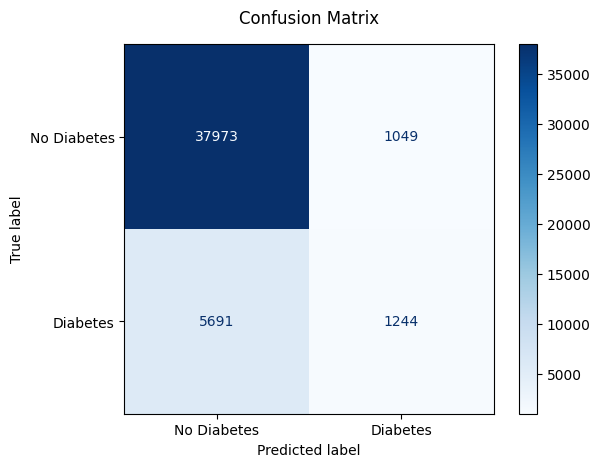

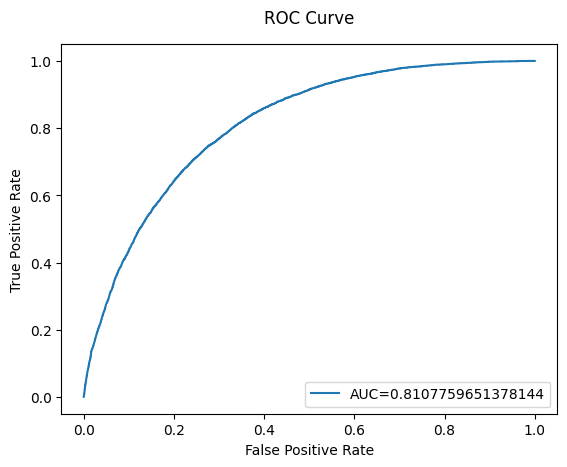

In [ ]:
# Evaluate the Model
XGB_model = XGBClassifier(learning_rate=0.5, max_depth=3, n_estimators=200, subsample=1)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

y_pred_proba = XGB_model.predict_proba(X_train)[:, 1]

XGB_accuracy = accuracy_score(y_test, y_pred)

print('XGBClassifier:')

print(f'Accuracy: {round(XGB_accuracy * 100, 2)}%', '\n')

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']), '\n')

# Plot confusion matrix
graph_confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Diabetes', 'Diabetes'], cmap='Blues') # Greys
plt.title('Confusion Matrix', pad=15)

graph_confusion_matrix
plt.show()
print()
# Plot ROC curve
#define metrics
y_pred_proba = XGB_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve', pad=15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Model 2: XGBClassifier

In [ ]:
LGB = LGBMClassifier()

parameters = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

start = time.time()
grid_search_LGB = GridSearchCV(LGB, parameters, cv = 5, n_jobs = -1, verbose = 1)

grid_search_LGB.fit(X_train, y_train)

model_name = LGB.__class__.__name__

print(f'model: {model_name} \nbest_score: {grid_search_LGB.best_score_} \nbest_params: {grid_search_LGB.best_params_}')
end = time.time()

print(f'This process took {round((end - start) / 60)} minutes')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 155662, number of negative: 155662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 311324, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
model: LGBMClassifier 
best_score: 0.8872527839715232 
best_params: {'learning_rate': 0.2, 'n_estimators': 150, 'num_leaves': 20}
This process took 8 minutes


[LightGBM] [Info] Number of positive: 155662, number of negative: 155662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 311324, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier:
Accuracy: 85.27% 

              precision    recall  f1-score   support

 No Diabetes       0.87      0.97      0.92     39022
    Diabetes       0.53      0.19      0.28      6935

    accuracy                           0.85     45957
   macro avg       0.70      0.58      0.60     45957
weighted avg       0.82      0.85      0.82     45957
 



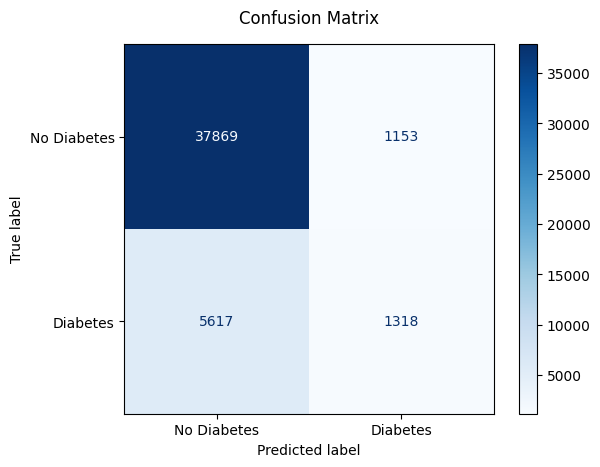

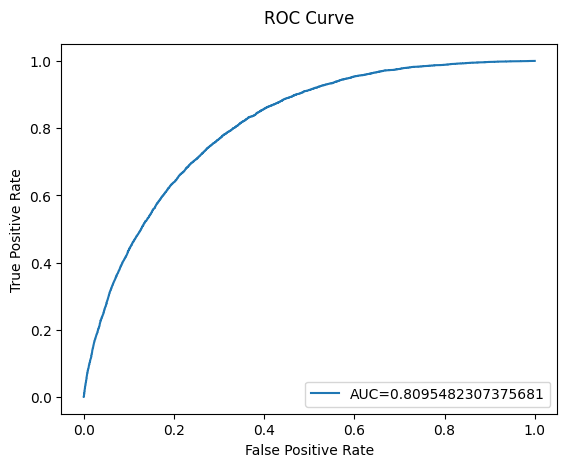

In [ ]:
# Evaluate the Model
LGBM_model = LGBMClassifier(learning_rate=0.2, n_estimators=150, num_leaves=20)
LGBM_model.fit(X_train, y_train)
y_pred = LGBM_model.predict(X_test)

LGBM_accuracy = accuracy_score(y_test, y_pred)

print('LGBMClassifier:')

print(f'Accuracy: {round(LGBM_accuracy * 100, 2)}%', '\n')

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']), '\n')

# Plot confusion matrix
graph_confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Diabetes', 'Diabetes'], cmap='Blues') # Greys
plt.title('Confusion Matrix', pad=15)

graph_confusion_matrix

plt.show()
print()
# Plot ROC curve
#define metrics
y_pred_proba = LGBM_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve', pad=15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Evaluating Model Using K-Fold Cross Validation

In [ ]:
# For Evaluating Predictive Models By Using K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, KFold

Let's try using `K-Fold cross-validation` to yield a much better measure of model quality.

> This method is used to estimate the skill of a machine learning model on unseen data. It will **evaluate the model multiple times** so you can be more confident about the model design. k value is how many samples the data will split. The choice of k is usually 5 or 10, being **10 the most common** in the field of applied machine learning, but there is no formal rule.

Utilizing K-Fold cross-validation, `XGBClassifier` still remains as the best model.

In [ ]:
XGB_model = XGBClassifier(learning_rate=0.5, max_depth=3, n_estimators=200, subsample=1)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

kf = KFold(n_splits = 10, shuffle = True, random_state=42)
scores = cross_val_score(XGB_model, X, y, cv = kf) # scoring="score" by default

print('XGBClassifier:')

print(f'Accuracy: {round(scores.mean() * 100, 2)}%', f'\nStandard deviation: {scores.std()}')

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']), '\n')

XGBClassifier:
Accuracy: 85.33% 
Standard deviation: 0.0013578275357634876
              precision    recall  f1-score   support

 No Diabetes       0.87      0.97      0.92     39022
    Diabetes       0.54      0.18      0.27      6935

    accuracy                           0.85     45957
   macro avg       0.71      0.58      0.59     45957
weighted avg       0.82      0.85      0.82     45957
 



In [ ]:
LGBM_model = LGBMClassifier(learning_rate=0.2, n_estimators=150, num_leaves=20)
LGBM_model.fit(X_train, y_train)
y_pred = LGBM_model.predict(X_test)

kf = KFold(n_splits = 10, shuffle = True, random_state=42)
scores = cross_val_score(LGBM_model, X, y, cv = kf) # scoring="score" by default

print('LGBMClassifier:')

print(f'Accuracy: {round(scores.mean() * 100, 2)}%', f'\nStandard deviation: {scores.std()}')

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']), '\n')

[LightGBM] [Info] Number of positive: 155662, number of negative: 155662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 311324, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 31617, number of negative: 175185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 206802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152885 -> initscore

Comparing Models

After doing k-fold validation, we could verify that both models yield an accuracy of 85% but when it comes to choose one of them, we can go with `LightGBM` since its faster than `XGBClassifier`

## Saving Model

In [ ]:
# For Saving the model
import joblib

A a last step, after developing the model, we need to save it for later uses.



In [ ]:
# Save the model in the 'model' directory
model_dir = "../model"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, "random_forest.joblib")
joblib.dump(best_model, model_path)

If we want to verify that the model was saved we can load it and try it out on new data:

In [ ]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./random_forest.joblib")

# Loading  new data
new_data = pd.read_csv('new_data.csv')

# Use it to verify its working
loaded_rf.predict(new_data)

## Next Steps 🔜

This machine learning solution for early diabetes detection aimed to predict diabetes risk in its nascent stage, enabling healthcare providers to intervene with a personalized care plan and lifestyle recommendations to prevent its development.


There is always room for improvement, and for this project these are some things tha could be done to improve its predictiveness of the model:

- Better Feature Engineering
- Better experiments with Scaling
- Feature Encoding if we add some categorical data
- Better Model Tuning by playing a bit more with its hyperparameters
- Removing Features with High Correlation
- Experiments on more other algorithms and other hyperparameters



---



You're Awesome 😍, you just reached the end of this post. If you have any questions just [drop me a message on my LikedIn](https://www.linkedin.com/in/enriquemosqueira/). Also, any suggestion or kudos would be quite appreciated. Did you find it useful? [Check out my other posts here](https://mrenrique.github.io/blog/), I'm sure you'll find something interesting 💡.

Share this post with your friends/colleagues, and if you are in a good mood, [buy me a cup of coffee ☕](https://www.buymeacoffee.com/enriquemr9X). Nos vemos! 🏃💨